In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

In [4]:
from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(color=
    [ 
        '#9467bd', 
        '#2ca02c', 
        '#ff7f0e', 
        '#1f77b4', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
)

labels = [8, 16, 32, 64, 128, 192, 256]
# single dispute
raw_data = {
    'registration':                              [106373, 106385, 106373, 106385, 106385,  106373,  106385], 
    'share distribution':                        [105676, 123113, 158008, 227961, 368302,  509319,  650939], 
    'dispute':                                   [105661, 150486, 240007, 419541, 779808, 1141484, 1505167], 
    'key share submission':                      [222510, 222510, 222510, 222510, 222510,  222510,  222510], 
    'key share recovery':                        [ 32519,  32519,  32519,  32507,  32519,   32519,   32519], 
    'recovered key share submission':            [222486, 222498, 222510, 222498, 222498,  222498,  222510], 
    'recovered key share submission, duplicate': [ 27925,  27937,  27949,  27937,  27937,   27949,   27949], 
    'master key submission':                     [265465, 312432, 406379, 594488, 971474, 1349484, 1728530], 
    'master key submission, duplicate':          [ 25237,  25249,  25237,  25237,  25237,   25237,   25249]
}

# max disputes
# raw_data = {
#     'registration':                              [106385, 106385, 106373, 106385, 106373,  106373,  106385], 
#     'share distribution':                        [105676, 123113, 158020, 227961, 368278,  509319,  650999], 
#     'dispute':                                   [105697, 150450, 240031, 419541, 779652, 1141472, 1504927], 
#     'key share submission':                      [222498, 222510, 222510, 222510, 222510,  222510,  222510], 
#     'key share recovery':                        [ 37216,  55952,  93462, 168495, 319064,  470197,  621834], 
#     'recovered key share submission':            [222498, 222510, 222498, 222474, 222510,  222498,  222510, 222486, 222498, 222486, 222498, 222450, 222498, 222510, 222510, 222498, 222498, 222486, 222486, 222462, 222510, 222498, 222486, 222510, 222510, 222498, 222486, 222486, 222498, 222498, 222498, 222486, 222486, 222498, 222510, 222510, 222486, 222510, 222486, 222486, 222486, 222510, 222462, 222498, 222498, 222498, 222486, 222498, 222498, 222498, 222510, 222510, 222486, 222486, 222510, 222510, 222498, 222510, 222498, 222510, 222498, 222474, 222486, 222498, 222498, 222510, 222510, 222498, 222486, 222498, 222510, 222474, 222510, 222498, 222498, 222498, 222498, 222426, 222498, 222510, 222510, 222510, 222498, 222486, 222486, 222498, 222510, 222510, 222486, 222498, 222498, 222498, 222510, 222510, 222462, 222474, 222498, 222510, 222510, 222486, 222498, 222510, 222486, 222510, 222510, 222498, 222510, 222510, 222486, 222498, 222486, 222510, 222510, 222498, 222498, 222486, 222486, 222474, 222486, 222438, 222498, 222498, 222510, 222510, 222510, 222510, 222510, 222474, 222510, 222462, 222498, 222498, 222498, 222498, 222498, 222486, 222510, 222462, 222486, 222510, 222486, 222486, 222510, 222510, 222438, 222510, 222474, 222498, 222486, 222510, 222498, 222486, 222486, 222510, 222498, 222498, 222498, 222486, 222486, 222510, 222486, 222498, 222486, 222486, 222462, 222510, 222510, 222498, 222510, 222498, 222486, 222498, 222474, 222498, 222498, 222510, 222498, 222486, 222498, 222498, 222510, 222510, 222486, 222498, 222510, 222510, 222498, 222486, 222486, 222498, 222498, 222498, 222462, 222474, 222474, 222510, 222486, 222510, 222498, 222498, 222510, 222498, 222510, 222498, 222498, 222498, 222486, 222498, 222438, 222510, 222486, 222486, 222486, 222498, 222486, 222498, 222486, 222486, 222486, 222498, 222498, 222510, 222474, 222498, 222510, 222510, 222474, 222486, 222498, 222498, 222498, 222462, 222486, 222498, 222510, 222498, 222486, 222486, 222486, 222510, 222498, 222510, 222510, 222486, 222486, 222474, 222498, 222498, 222510, 222498, 222474, 222486, 222498, 222510, 222474, 222474, 222462, 222498, 222510, 222510, 222486, 222486, 222498, 222510, 222498, 222486, 222510, 222510, 222498, 222498, 222498, 222510, 222498, 222474, 222498, 222498, 222462, 222486, 222498, 222486, 222474, 222510, 222498, 222486, 222510, 222498, 222498, 222510, 222474, 222498, 222486, 222510, 222462, 222486, 222498, 222498, 222498, 222510, 222474, 222486, 222462, 222510, 222510, 222510, 222498, 222498, 222498, 222498, 222498, 222498, 222510, 222510, 222510, 222498, 222498, 222498, 222498, 222498, 222498, 222510, 222510, 222486, 222498, 222498, 222498, 222474, 222498, 222486, 222486, 222486, 222486, 222510, 222498, 222510], 
#     'recovered key share submission, duplicate': [ 27937,  27949,  27937,  27913,  27949,   27925,   27925, 27925, 27937, 27925, 27937, 27889, 27937, 27949, 27949, 27937, 27937, 27925, 27937, 27913, 27937, 27949, 27925, 27949, 27937, 27937, 27925, 27925, 27913, 27937, 27937, 27937, 27901, 27925, 27949, 27949, 27913, 27937, 27925, 27925, 27925, 27913, 27889, 27937, 27925, 27925, 27925, 27937, 27937, 27949, 27925, 27949, 27949, 27925, 27949, 27949, 27937, 27949, 27925, 27949, 27937, 27913, 27925, 27937, 27925, 27949, 27949, 27937, 27925, 27937, 27949, 27913, 27949, 27925, 27925, 27937, 27937, 27865, 27925, 27937, 27949, 27937, 27937, 27937, 27937, 27949, 27937, 27949, 27925, 27937, 27937, 27925, 27937, 27949, 27913, 27913, 27925, 27949, 27949, 27925, 27937, 27949, 27925, 27937, 27949, 27937, 27925, 27949, 27925, 27949, 27937, 27949, 27949, 27937, 27937, 27925, 27913, 27901, 27925, 27889, 27937, 27937, 27937, 27949, 27949, 27925, 27949, 27901, 27937, 27901, 27937, 27937, 27937, 27937, 27937, 27913, 27949, 27913, 27925, 27949, 27925, 27925, 27949, 27949, 27877, 27949, 27913, 27937, 27937, 27949, 27937, 27925, 27937, 27949, 27937, 27937, 27937, 27913, 27925, 27949, 27925, 27937, 27925, 27937, 27901, 27949, 27949, 27937, 27949, 27949, 27925, 27937, 27925, 27937, 27937, 27949, 27937, 27925, 27937, 27949, 27949, 27949, 27937, 27937, 27949, 27949, 27937, 27937, 27925, 27937, 27937, 27937, 27925, 27913, 27901, 27937, 27925, 27937, 27949, 27913, 27949, 27937, 27925, 27937, 27949, 27937, 27949, 27949, 27901, 27949, 27925, 27925, 27913, 27937, 27937, 27937, 27925, 27937, 27925, 27937, 27949, 27949, 27913, 27937, 27949, 27949, 27913, 27949, 27937, 27937, 27937, 27901, 27925, 27937, 27949, 27937, 27913, 27925, 27925, 27949, 27937, 27949, 27937, 27925, 27925, 27913, 27937, 27949, 27949, 27937, 27913, 27937, 27937, 27949, 27913, 27913, 27901, 27937, 27949, 27949, 27937, 27901, 27937, 27949, 27937, 27925, 27949, 27949, 27925, 27937, 27937, 27937, 27937, 27925, 27937, 27925, 27925, 27925, 27937, 27925, 27925, 27937, 27937, 27925, 27949, 27937, 27937, 27949, 27925, 27937, 27913, 27949, 27901, 27913, 27925, 27937, 27937, 27949, 27913, 27925, 27901, 27949, 27937, 27949, 27925, 27937, 27937, 27949, 27925, 27949, 27949, 27937, 27949, 27925, 27937, 27937, 27937, 27937, 27925, 27937, 27949, 27913, 27937, 27937, 27937, 27913, 27937, 27925, 27913, 27949, 27925, 27937, 27925, 27949], 
#     'master key submission':                     [265465, 312420, 406379, 594500, 971474, 1349496, 1728518], 
#     'master key submission, duplicate':          [ 25237,  25237,  25237,  25249,  25237,   25249,   25237]
# }


In [5]:
R = raw_data

# accessed May 15th

# average recommended gas fees for standard confirmation times from
#
# https://ethgasstation.info/               62
# https://etherscan.io/gastracker/          72
# https://www.gasnow.org/                   62
#
# 65 GWei

# Coinmarket Cap, accessed May 15th
# Exchange from 3 850 USD
# 

L = len("master key verification: ")


for GAS_PRICE_GWEI, ETH_TO_USD in [(2, 165), (65, 3850)]:

    GAS_TO_USD = GAS_PRICE_GWEI / 10**9 * ETH_TO_USD

    print("n:".ljust(L) + "      8      16      32      64     128     192     256")

    print("base:".ljust(L), end="")
    for i, n in enumerate(labels):
        basic = R["registration"][i] + R["share distribution"][i] + R["key share submission"][i]
        basic *= GAS_TO_USD
        print(f"{basic:.2f}".rjust(7), end=" ")
    print()

    print("dispute:".ljust(L), end="")
    for i, n in enumerate(labels):
        dispute = R["dispute"][i]
        dispute *= GAS_TO_USD
        print(f"{dispute:.2f}".rjust(7), end=" ")
    print()

    print("key share recovery:".ljust(L), end="")
    for i, n in enumerate(labels):
        dispute = R["key share recovery"][i]
        dispute *= GAS_TO_USD
        print(f"{dispute:.2f}".rjust(7), end=" ")
    print()

    print("master key verification:".ljust(L), end="")
    for i, n in enumerate(labels):
        costs = R["master key submission"][i]
        costs *= GAS_TO_USD
        print(f"{costs:.2f}".rjust(7), end=" ")
    print()

    print("deployment:".ljust(L), end="")
    for i, n in enumerate(labels):
        print(f"{2551221 * GAS_TO_USD:.2f}".rjust(7), end=" ")
    print()

    print()
    print()


n:                             8      16      32      64     128     192     256
base:                       0.14    0.15    0.16    0.18    0.23    0.28    0.32 
dispute:                    0.03    0.05    0.08    0.14    0.26    0.38    0.50 
key share recovery:         0.01    0.01    0.01    0.01    0.01    0.01    0.01 
master key verification:    0.09    0.10    0.13    0.20    0.32    0.45    0.57 
deployment:                 0.84    0.84    0.84    0.84    0.84    0.84    0.84 


n:                             8      16      32      64     128     192     256
base:                     108.75  113.12  121.84  139.35  174.47  209.76  245.20 
dispute:                   26.44   37.66   60.06  104.99  195.15  285.66  376.67 
key share recovery:         8.14    8.14    8.14    8.13    8.14    8.14    8.14 
master key verification:   66.43   78.19  101.70  148.77  243.11  337.71  432.56 
deployment:               638.44  638.44  638.44  638.44  638.44  638.44  638.44 




In [8]:
R = raw_data

# accessed Aug 22nd

# average recommended gas fees for standard confirmation times from
#
# https://ethgasstation.info/               46
# https://etherscan.io/gastracker/          52
# https://www.gasnow.org/                   52
#
# 50 GWei

# Coinmarket Cap, accessed May 15th
# Exchange from 3 850 USD
# 

L = len("master key verification ")


for GAS_PRICE_GWEI, ETH_TO_USD in [(2, 165), (50, 3175)]:

    GAS_TO_USD = GAS_PRICE_GWEI / 10**9 * ETH_TO_USD

    print("number of nodes".ljust(L) + "      8      16      32      64     128     192     256")

    print("base".ljust(L), end="")
    for i, n in enumerate(labels):
        basic = R["registration"][i] + R["share distribution"][i] + R["key share submission"][i]
        basic *= GAS_TO_USD
        print(f"{basic:.2f}".rjust(7), end=" ")
    print()

    print("dispute".ljust(L), end="")
    for i, n in enumerate(labels):
        dispute = R["dispute"][i]
        dispute *= GAS_TO_USD
        print(f"{dispute:.2f}".rjust(7), end=" ")
    print()

    print("key share recovery".ljust(L), end="")
    for i, n in enumerate(labels):
        dispute = R["key share recovery"][i]
        dispute *= GAS_TO_USD
        print(f"{dispute:.2f}".rjust(7), end=" ")
    print()

    print("master key verification".ljust(L), end="")
    for i, n in enumerate(labels):
        costs = R["master key submission"][i]
        costs *= GAS_TO_USD
        print(f"{costs:.2f}".rjust(7), end=" ")
    print()

    print("deployment".ljust(L), end="")
    for i, n in enumerate(labels):
        print(f"{2551221 * GAS_TO_USD:.2f}".rjust(7), end=" ")
    print()

    print()
    print()


number of nodes               8      16      32      64     128     192     256
base                       0.14    0.15    0.16    0.18    0.23    0.28    0.32 
dispute                    0.03    0.05    0.08    0.14    0.26    0.38    0.50 
key share recovery         0.01    0.01    0.01    0.01    0.01    0.01    0.01 
master key verification    0.09    0.10    0.13    0.20    0.32    0.45    0.57 
deployment                 0.84    0.84    0.84    0.84    0.84    0.84    0.84 


number of nodes               8      16      32      64     128     192     256
base                      68.99   71.76   77.29   88.40  110.68  133.06  155.55 
dispute                   16.77   23.89   38.10   66.60  123.79  181.21  238.95 
key share recovery         5.16    5.16    5.16    5.16    5.16    5.16    5.16 
master key verification   42.14   49.60   64.51   94.37  154.22  214.23  274.40 
deployment               405.01  405.01  405.01  405.01  405.01  405.01  405.01 




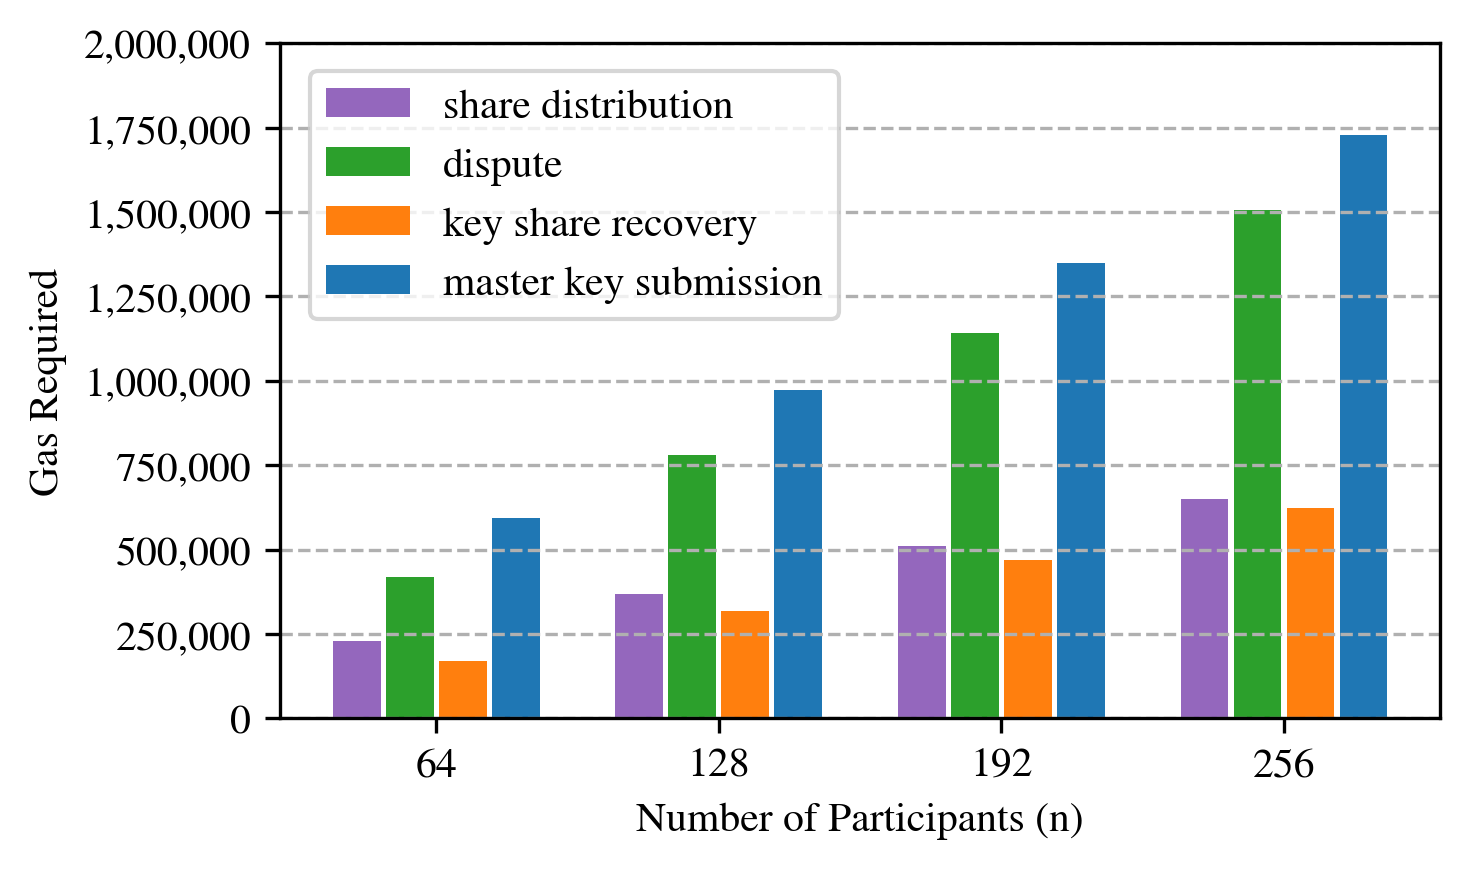

In [19]:




# using https://ethgasstation.info/calculatorTxV.php with average recommend gas price at 2020-01-20, 2 Gwei
min_total = 0.04 + 0.22        + 0.07               + 0.57
max_total = 0.04 + 0.22 + 0.50 + 0.07 + 0.21 + 0.07 + 0.57

# pre istanbul values
# labels = [8, 16, 32, 64, 128, 192, 256]
# raw_data = {  #                                        8      16       32       64      128      192      256
#     "registration":                              [107457, 107521,  107521,  107521,  107457,  107521,  107457],
#     "share distribution":                        [128704, 172713,  260636,  436737,  789894, 1143215, 1497403],
#     "dispute":                                   [405167, 614108, 1031681, 1866679, 3537362, 5210670, 6886217],
#     "dispute, duplicate":                        [ 69062, 104661,  175672,  317393,  600333,  884589, 1169330],
#     "key share submission":                      [517770, 517770,  517770,  517770,  517770,  517770,  517770],
#     "key share recovery":                        [ 51980, 101448,  200346,  398443,  794364, 1190669, 1588254],
#     "recovered key share submission":            [517450, 517770,  517770,  517642,  517706,  517642,  517514],
#     "recovered key share submission, duplicate": [ 41181,  41245,   41309,   41181,   41309,   41181,   41117],
#     "master key submission":                     [395577, 421332,  472891,  576264,  783586,  992060, 1201366],
#     "master key submission, duplicate":          [ 30849,  30849,   30849,   30913,   30849,   30913,   30785],
# }



labels.pop(0)
labels.pop(0)
labels.pop(0)

for v in raw_data.values():
    v.pop(0)
    v.pop(0)
    v.pop(0)

x = np.arange(len(labels))  # the label locations
w = 0.75

fig, ax = plt.subplots(dpi=300, figsize=(5, 3))

cats = [
#    "registration",
    "share distribution",
    "dispute",
#    "key share submission",
    "key share recovery",
    "master key submission"     
]

for i, k in enumerate(cats):
    r = ax.bar(x - w/2  + w/len(cats) * (i + 0.5), raw_data[k], w/len(cats)*0.9, 
               label=k) # hatch=('\\\\\\', '++', '///', 'xx', '\\', '*', 'o', 'O', '.')[i])
    
    
xlims = ax.get_xlim()
# plt.plot(xlims, [9_700_000]*2, color='red', label='block gas limit')
ax.set_xlim(xlims)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Participants (n)')
ax.set_ylabel('Gas Required')

ax.set_yticks([i*250_000 for i in range(9)])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.minorticks_off()
ax.yaxis.grid(which="major", linestyle='--')

ax.set_xticks(x)
ax.set_xticklabels(labels)

# ax.legend(ncol=2, bbox_to_anchor=(0.72, 0.65), loc=0)
ax.legend(bbox_to_anchor=(0.5, 0.56), loc=0)


fig.tight_layout()
plt.savefig('gas-costs-after-istanbul.png', bbox_inches='tight', pad_inches=0)
plt.savefig('gas-costs-after-istanbul.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


In [20]:
len(raw_data["recovered key share submission"])

331

In [21]:
64+128+192+256

640

In [22]:
min_total, max_total

(0.8999999999999999, 1.6800000000000002)

In [23]:
import math

for j, n in enumerate(labels):
    db = 13.  # current block interval by ethstats
    dc = 20      # wait for 20 confirmations (12 recommend by Vitalik)
    di = 30      # assume transactions get typically confirmed within 30 blocks
    c_max = 9_700_000 * 0.1  # use 10% of ethereums block gas limit
    
    c_max = 15_000_000 * 0.1  # use 10% of ethereums block gas limit
    
    
    c = raw_data["registration"][j] * n
    b_r = dc + di + math.ceil(c / c_max)
    
    c = raw_data["share distribution"][j] * n
    b_s = dc + di + math.ceil(c / c_max)
   
    c = raw_data["dispute"][j] * (n // 2 - 1)
    b_d = dc + di + math.ceil(c / c_max)
   
    c_k1 = raw_data["key share submission"][j] * (n // 2 + 1)
    c_k2 = raw_data["key share recovery"][j] * (n // 2 + 1)
    c_k3 = raw_data["recovered key share submission"][j] * (n // 2 - 1)   
    b_k_min = 2*dc + 2*di + math.ceil(c_k1 / c_max)
    b_k_max = 4*dc + 4*di + math.ceil(c_k1 / c_max) + math.ceil(c_k2 / c_max) + math.ceil(c_k3 / c_max)
    
    t_min = db * (b_r + b_s + b_d + b_k_min)
    t_max = db * (b_r + b_s + b_d + b_k_max)
    
    print(n, math.ceil(t_min / 60), math.ceil(t_max / 60), b_r, b_s, b_d, b_k_min, b_k_max)
    
    


64 61 85 55 60 59 105 214
128 73 100 60 82 83 110 234
192 91 123 64 116 123 115 261
256 115 153 69 162 178 120 293


In [24]:
#  64  65  89                    58 66 64 108 222
# 128  83 113                    65 99 101 115 252
# 192 111 147                    72 151 162 123 293
# 256 148 194                    79 222 248 130 343

In [25]:
325 / 60

5.416666666666667

In [26]:
64.13333333333334

64.13333333333334